In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  
import numpy as np  

# Question 3.

## Preliminary questions.

1. What are the columns in the dataset, and what do they represent?
2. How many countries or regions are included in the dataset?
3. What is the time period covered by the dataset (years)?
4. Which top 5 countries or regions with the highest total CO2 emissions?
5. What are the top 5 countries or regions with the lowest total CO2 emissions?
6. Which top 5 countries or regions with the highest CO2 emissions in the most recent year?
7. What are the top five countries or regions with the lowest CO2 emissions in the most recent year?
8. Which year had the highest global CO2 emissions?
9. Which year had the lowest global CO2 emissions?
10. What is the average annual change in CO2 emissions for each country or region over the entire time period covered by the dataset?
11. What is the proportion of CO2 emissions contributed by the top 5 emitting countries or regions in the most recent year?
12. How have global CO2 emissions changed over the years?


# Question 4

## Loading the data into an appropriate pandas data frame

### Reading CO2 Emission Dataset

#### Overview
The code snippet utilizes Pandas to read a CSV file named "SYB66_310_202310_Carbon Dioxide Emission Estimates.csv." The `skiprows=1` parameter is employed to skip the first row during the reading process.

#### Details
- **File:** "SYB66_310_202310_Carbon Dioxide Emission Estimates.csv"
- **Encoding:** 'latin1' (specified encoding for reading the file)

#### Purpose
This action aims to load the CO2 emission dataset into a Pandas DataFrame named 'df' for subsequent exploratory data analysis (EDA).

In [2]:
# Read the CSV file, skipping the first row
df = pd.read_csv("SYB66_310_202310_Carbon Dioxide Emission Estimates.csv", encoding='latin1', skiprows=1)

# Question 5 (Performing exploratory data analysis (EDA))

## 5 a) 

### Extracting Column Names

This code snippet below:

- Retrieves the column names from the Pandas DataFrame 'df'.
- Prints the original column names for initial dataset understanding.

In [3]:
# Get the column names from the DataFrame
columns = df.columns

# Print the original column names
print("Original column names:")
print("-----------------------")
print(columns)

Original column names:
-----------------------
Index(['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')


### Renaming Columns in DataFrame

The code snippet renames columns in a Pandas DataFrame:

- Renames the 'Region/Country/Area' column to 'Region/Area' and assigns it to a new DataFrame 'data_df.'
- Renames the 'Unnamed: 1' column to 'Country' in the updated DataFrame 'data_cleaned.'
- Prints and displays the updated column names for clarity and consistency in the dataset, facilitating subsequent analysis.

In [4]:
# Rename the 'Region/Country/Area' column to 'Region/Area'
data_df = df.rename(columns={'Region/Country/Area': 'Region/Area'})

# Rename the 'Unnamed: 1' column to 'Country'
data_cleaned = data_df.rename(columns={'Unnamed: 1': 'Country'})

# Print the updated column names
print("Updated column names:")
print("-----------------------")

# Display the updated column names after the first renaming
print(data_cleaned.columns)

Updated column names:
-----------------------
Index(['Region/Area', 'Country', 'Year', 'Series', 'Value', 'Footnotes',
       'Source'],
      dtype='object')


### Printing Dataset Information

This code snippet below:

- Prints a header indicating "Dataset Information."
- Separates the header from the dataset information with a dashed line.
- Calls the `info` method on the 'data_cleaned' DataFrame, displaying essential information about the dataset, including data types, non-null counts, and memory usage.

In [5]:
print("=> Dataset Information:")
print("-----------------------")
data_cleaned.info()

=> Dataset Information:
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region/Area  2264 non-null   int64 
 1   Country      2264 non-null   object
 2   Year         2264 non-null   int64 
 3   Series       2264 non-null   object
 4   Value        2264 non-null   object
 5   Footnotes    256 non-null    object
 6   Source       2264 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.9+ KB


### Displaying Data Types

This code snippet below:

- Prints a header indicating "Displaying our datatypes."
- Separates the header from the data types display with a dashed line.
- Calls the `dtypes` attribute on the 'data_cleaned' DataFrame, revealing the data types of each column.

In [6]:
print("=> Displaying our datatypes:")
print("----------------------------")
data_cleaned.dtypes

=> Displaying our datatypes:
----------------------------


Region/Area     int64
Country        object
Year            int64
Series         object
Value          object
Footnotes      object
Source         object
dtype: object

### Data Size

This code snippet below:

- Prints a header indicating "Data Size."
- Separates the header from the data size display with a dashed line.
- Calls the `shape` attribute on the 'data_cleaned' DataFrame, providing the dimensions (number of rows and columns) of the dataset.

In [7]:
print("=> Data Size:")
print("-------------")
data_cleaned.shape

=> Data Size:
-------------


(2264, 7)

### Count of Unique Values in Each Column

This code snippet below:

- Prints a header indicating "Count of unique values in each column."
- Separates the header from the unique values count display with a dashed line.
- Utilizes a loop to iterate through each column in the 'data_cleaned' DataFrame.
- Prints the column name along with the count of unique values using the `nunique()` method.

In [8]:
print("=> Count of unique values in each column:  ")
print("---------------------------------------------")
print("")
for column in data_cleaned.columns:
    print(f"{column}: => {data_cleaned[column].nunique()} unique values")

=> Count of unique values in each column:  
---------------------------------------------

Region/Area: => 149 unique values
Country: => 149 unique values
Year: => 8 unique values
Series: => 2 unique values
Value: => 1314 unique values
Footnotes: => 15 unique values
Source: => 1 unique values


### Removing 'Source' Column

This code snippet below:

- Removes the 'Source' column from the 'data_cleaned' DataFrame using the `drop` method.
- The `axis=1` parameter specifies that the removal is along columns.
- The `inplace=True` parameter ensures that the changes are made directly to the existing DataFrame.

In [9]:
data_cleaned.drop('Source', axis=1, inplace=True)

### Exploring CO2 Emission Trends and Distribution

1. **Basic Statistics Display:**
   - The code computes and prints basic statistical measures (count, mean, std deviation, min, quartiles, max) for the 'Year' and 'Value' columns, offering an overview of their distribution.

2. **Line Plot for Emission Trends Over Time:**
   - The line plot visualizes the trends of CO2 emissions over the years. The x-axis represents the years, and the y-axis represents the corresponding CO2 emission values. The line is drawn with markers for each data point.

3. **Histogram for Emission Value Distribution:**
   - The histogram illustrates the distribution of CO2 emission values. It includes a kernel density estimate (kde) for a smoother representation. The number of bins is set to 20 for granularity.

=> Basic Statistics for Significant Fields:
------------------------------------------
              Year
count  2264.000000
mean   2007.206714
std      15.056166
min    1975.000000
25%    2005.000000
50%    2015.000000
75%    2019.000000
max    2020.000000


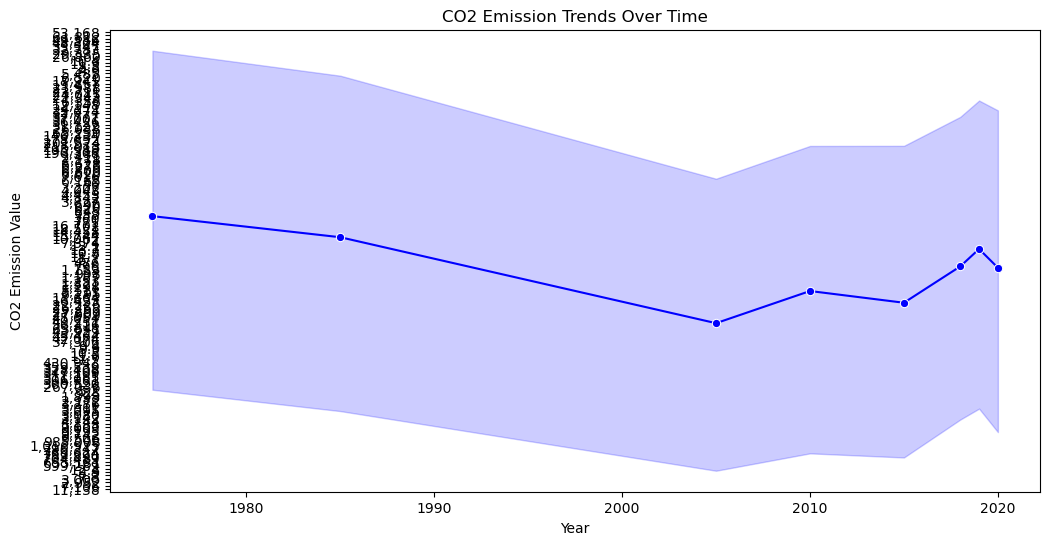

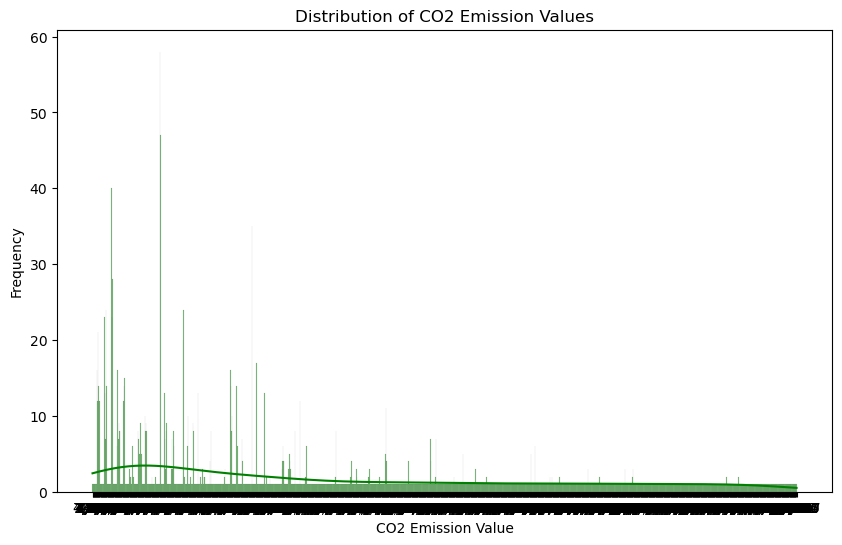

In [10]:
# Year' and 'Value' are significant fields
significant_fields = ['Year', 'Value']

# Display basic statistics for significant fields
print("=> Basic Statistics for Significant Fields:")
print("------------------------------------------")
print(data_cleaned[significant_fields].describe())

# Visualize the distribution of 'Value' over 'Year'
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', data=data_cleaned, marker='o', color='b')
plt.title('CO2 Emission Trends Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emission Value')
plt.show()

# Visualize the distribution of 'Value' with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Value'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribution of CO2 Emission Values')
plt.xlabel('CO2 Emission Value')
plt.ylabel('Frequency')
plt.show()

## 5 b)

### Display Basic Statistics for Numerical Columns

This code utilizes the `describe()` method to generate fundamental statistical measures for numerical columns in the dataset. This summary offers insights into the central tendency, spread, and distribution of the 'Region/Area' and 'Year' columns.

- `count`: Number of non-null entries in each column.
- `mean`: Average value of the data.
- `std`: Standard deviation, a measure of the data's dispersion.
- `min`: Minimum value in the dataset.
- `25%`, `50%`, `75%`: Quartiles, representing percentiles of the data.
- `max`: Maximum value in the dataset.

In [11]:
# Display basic statistics for numerical columns
print("=> Basic Statistics for Numerical Columns:")
print("------------------------------------------")
print(data_cleaned.describe())

=> Basic Statistics for Numerical Columns:
------------------------------------------
       Region/Area         Year
count  2264.000000  2264.000000
mean    435.726148  2007.206714
std     250.044067    15.056166
min       8.000000  1975.000000
25%     218.000000  2005.000000
50%     414.000000  2015.000000
75%     646.000000  2019.000000
max     894.000000  2020.000000


### Visualizing the Distribution of Numerical Data

The code below creates a histogram and kernel density estimate (KDE) plot for numerical columns in the dataset. Here's a breakdown:

- `plt.figure(figsize=(15, 8))`: Sets the size of the figure for better visibility.
- `sns.histplot(...)`: Generates a histogram with specified parameters:
  - `data_cleaned.select_dtypes(include=['int64', 'float64'])`: Selects numerical columns for visualization.
  - `bins=20`: Specifies the number of bins or intervals in the histogram.
  - `kde=True`: Adds a kernel density estimate for a smoother representation.
  - `color='skyblue'`: Sets the color of the bars.
  - `edgecolor='black'`: Defines the edge color of the bars.
- `plt.title(...)`: Adds a title to the plot.
- `plt.xlabel(...)`: Labels the x-axis.
- `plt.ylabel(...)`: Labels the y-axis.
- `plt.show()`: Displays the generated plot.

=> Visualizing the distribution of numerical data:
--------------------------------------------------


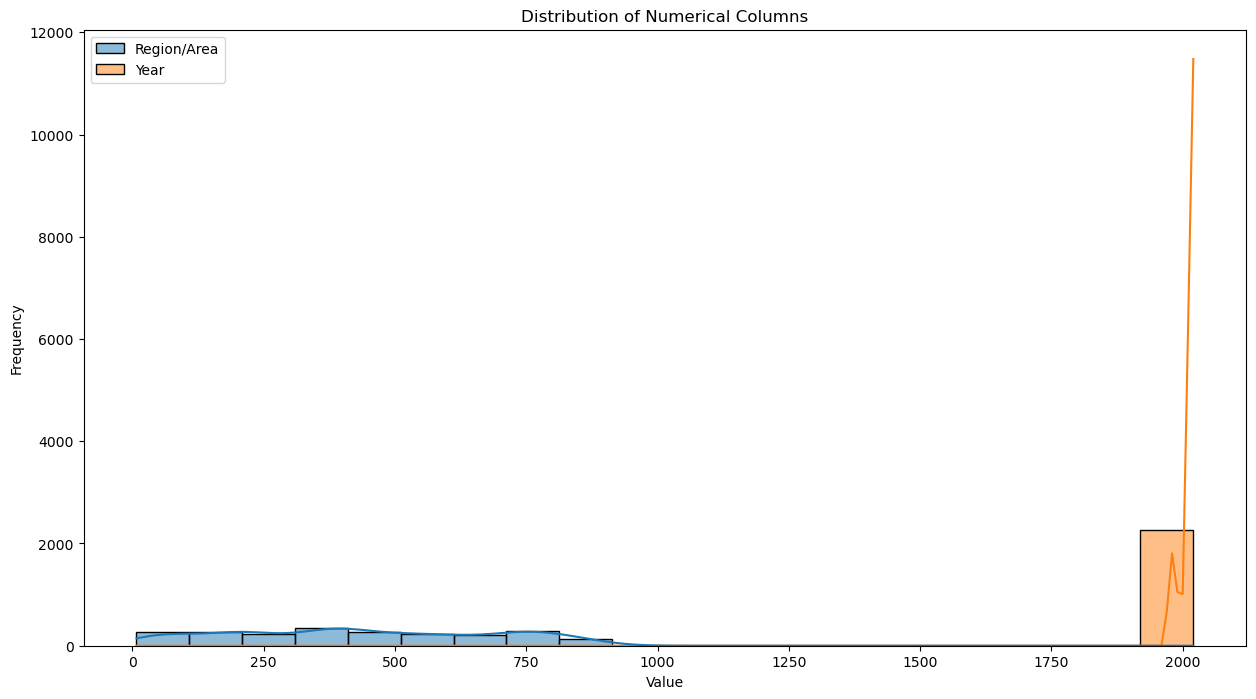

In [12]:
print("=> Visualizing the distribution of numerical data:")
print("--------------------------------------------------")

# Visualize the distribution of numerical columns
plt.figure(figsize=(15, 8))
sns.histplot(data_cleaned.select_dtypes(include=['int64', 'float64']), bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## 5 c)

### Cleaning and Converting 'Value' Column

The code snippet below:

- Modifies the 'Value' column in the 'data_cleaned' DataFrame.
- Utilizes the `str.replace` method to remove commas from numeric values in the 'Value' column.
- Converts the cleaned values to float using the `astype(float)` method.
- The original 'Value' column, potentially containing comma-formatted numbers, is now transformed into a numerical format suitable for analysis.

In [13]:
data_cleaned['Value'] = data_cleaned['Value'].str.replace(',','').astype(float)

### Creating a Dataset for Emissions per Thousand Metric Tons of CO2

The code snippet below:

- Creates a new dataset named 'Emissions_thousand_metric_tons_of_Co2' by filtering the 'data_cleaned' DataFrame.
- Specifically selects rows where the 'Value' column is greater than 100, indicating emissions per thousand metric tons of CO2.
- The filtering is achieved using the condition `data_cleaned['Value']>100`.
- The resulting dataset focuses on instances where the CO2 emissions are measured in thousand metric tons.

In [14]:
#separate dataset for  emmisions per thousanddf['Value'] = df['Value'].str.replace(',','').astype(float)
Emissions_thousand_metric_tons_of_Co2 = data_cleaned[data_cleaned['Value']>100]
Emissions_thousand_metric_tons_of_Co2

,Region/Area,Country,Year,Series,Value,Footnotes
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4524.0,NaN
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,7145.0,NaN
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3980.0,NaN
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,4074.0,NaN
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3975.0,NaN
...,...,...,...,...,...,...
2251,716,Zimbabwe,2010,Emissions (thousand metric tons of carbon diox...,11666.0,NaN
2252,716,Zimbabwe,2015,Emissions (thousand metric tons of carbon diox...,14067.0,NaN
2253,716,Zimbabwe,2018,Emissions (thousand metric tons of carbon diox...,13300.0,NaN
2254,716,Zimbabwe,2019,Emissions (thousand metric tons of carbon diox...,12525.0,NaN


### Filtering Dataset for Emissions per Capita Below 100

The code creates a new dataset named 'Emissions_per_capita' by filtering the original 'data_cleaned' DataFrame. It selects rows where the 'Value' column is less than 100, focusing specifically on entries related to emissions per capita. This filtering operation is useful for isolating data points that fall within a certain range of emissions per capita, facilitating a more targeted analysis or visualization.

In [15]:
# dataset with values containing dots
Emissions_per_capita = data_cleaned[data_cleaned['Value']<100]

### Merging Datasets and Renaming Columns

The code merges two datasets, 'Emissions_thousand_metric_tons_of_Co2' and 'Emissions_per_capita,' based on common columns 'Country' and 'Year.' The resulting DataFrame is stored in 'new_df.' Additionally, the code renames the columns 'Value_x' and 'Value_y' to 'Emissions_per_thousand' and 'Emissions_per_capita,' respectively, for clarity and coherence in the dataset.

In [16]:
data = Emissions_per_capita[['Country', 'Year', 'Value']]
new_df= pd.merge(Emissions_thousand_metric_tons_of_Co2, data, on = ['Country', 'Year'])
# columns name renaming
new_df.rename(columns={'Value_x': 'Emissions_per_thousand', 'Value_y': 'Emissions_per_capita'},  inplace=True)
new_df

,Region/Area,Country,Year,Series,Emissions_per_thousand,Footnotes,Emissions_per_capita
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4524.0,NaN,1.8
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,7145.0,NaN,2.3
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3980.0,NaN,1.3
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,4074.0,NaN,1.4
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3975.0,NaN,1.3
...,...,...,...,...,...,...,...
1124,716,Zimbabwe,2010,Emissions (thousand metric tons of carbon diox...,11666.0,NaN,0.7
1125,716,Zimbabwe,2015,Emissions (thousand metric tons of carbon diox...,14067.0,NaN,0.8
1126,716,Zimbabwe,2018,Emissions (thousand metric tons of carbon diox...,13300.0,NaN,0.7
1127,716,Zimbabwe,2019,Emissions (thousand metric tons of carbon diox...,12525.0,NaN,0.7


### Converting Column to Numeric

The code converts the 'Emissions_per_capita' column in the 'new_df' DataFrame to numeric format, ensuring that the values are represented as floating-point numbers.

In [17]:
new_df['Emissions_per_capita'] = pd.to_numeric(new_df['Emissions_per_capita'], errors='coerce').astype('float64')
new_df

,Region/Area,Country,Year,Series,Emissions_per_thousand,Footnotes,Emissions_per_capita
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4524.0,NaN,1.8
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,7145.0,NaN,2.3
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3980.0,NaN,1.3
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,4074.0,NaN,1.4
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3975.0,NaN,1.3
...,...,...,...,...,...,...,...
1124,716,Zimbabwe,2010,Emissions (thousand metric tons of carbon diox...,11666.0,NaN,0.7
1125,716,Zimbabwe,2015,Emissions (thousand metric tons of carbon diox...,14067.0,NaN,0.8
1126,716,Zimbabwe,2018,Emissions (thousand metric tons of carbon diox...,13300.0,NaN,0.7
1127,716,Zimbabwe,2019,Emissions (thousand metric tons of carbon diox...,12525.0,NaN,0.7


### Visualizing Mean Emissions Trends Over Years

This code performs the following tasks:

1. **Grouping by Year:** The DataFrame `new_df` is grouped by the 'Year' column.
2. **Calculating Mean:** The mean is calculated for each group, representing the average value for each year.
3. **Visualization with Subplots:** The code creates a figure with two subplots (side by side) using `plt.subplots(1, 2, figsize=(15, 5))`.
4. **Bar Plots:** Two bar plots are created within the subplots, one for the mean of 'Emissions_per_capita' and the other for 'Emissions_per_thousand'.
5. **Color Mapping:** Colors are assigned to each bar in the plots using a colormap (`plt.cm.viridis`).
6. **Titles and Labels:** Titles are set for each subplot, indicating the type of emissions. The X-axis represents the years, and the Y-axis represents the mean emissions values.
7. **Display:** The final visualization with both subplots is shown using `plt.show()`.

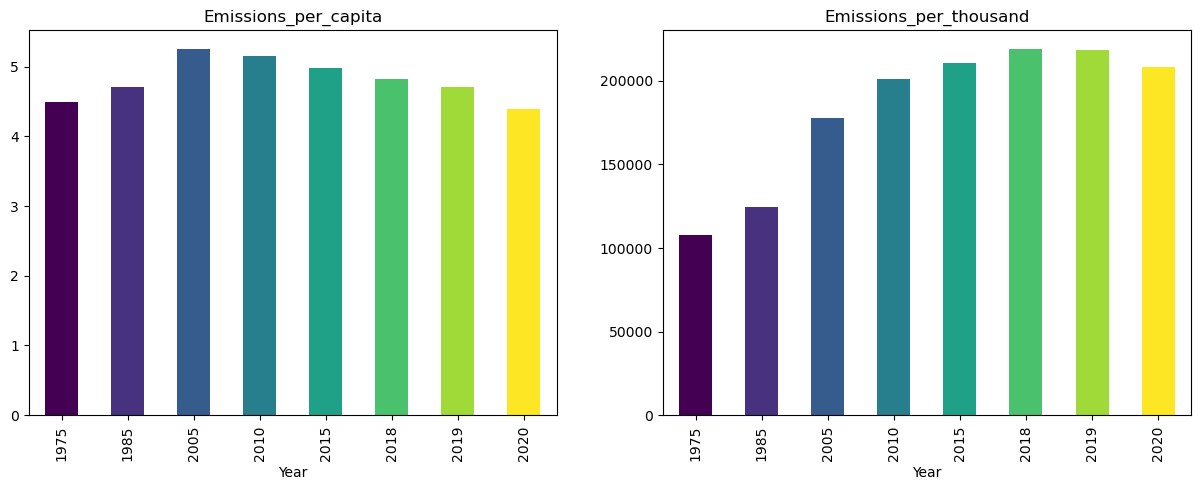

In [18]:
# Group by 'Year' and calculate the mean for each group
data = new_df.groupby('Year').mean(numeric_only='number')

# List of colors for each bar
num_colors = len(data)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

# Subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Emissions_per_capita
axe = ax[0]
data['Emissions_per_capita'].plot(kind='bar', ax=axe, color=colors)
axe.set_title('Emissions_per_capita')

# Plot for Emissions_per_thousand
axe = ax[1]
data['Emissions_per_thousand'].plot(kind='bar', ax=axe, color=colors)
axe.set_title('Emissions_per_thousand')

# Show the plot
plt.show()

### Top Countries with Highest Emissions per Capita

This code focuses on visualizing the top countries with the highest values in the 'Emissions_per_capita' column. Here's what each part of the code does:

1. **Selection of Column:** The variable `column_to_plot` is set to 'Emissions_per_capita', indicating the specific column to visualize.
2. **Top Countries Selection:** The DataFrame is filtered to include only the top 20 countries with the highest values in the selected column using `nlargest(20, column_to_plot)`.
3. **Bar Plot Creation:** A bar plot is created using `plt.bar()` to represent the values of 'Emissions_per_capita' for each of the top 20 countries.
4. **Styling:** Labels, title, and rotation of x-axis labels are added for clarity and aesthetics.
5. **Display:** The final bar plot is displayed using `plt.show()`.

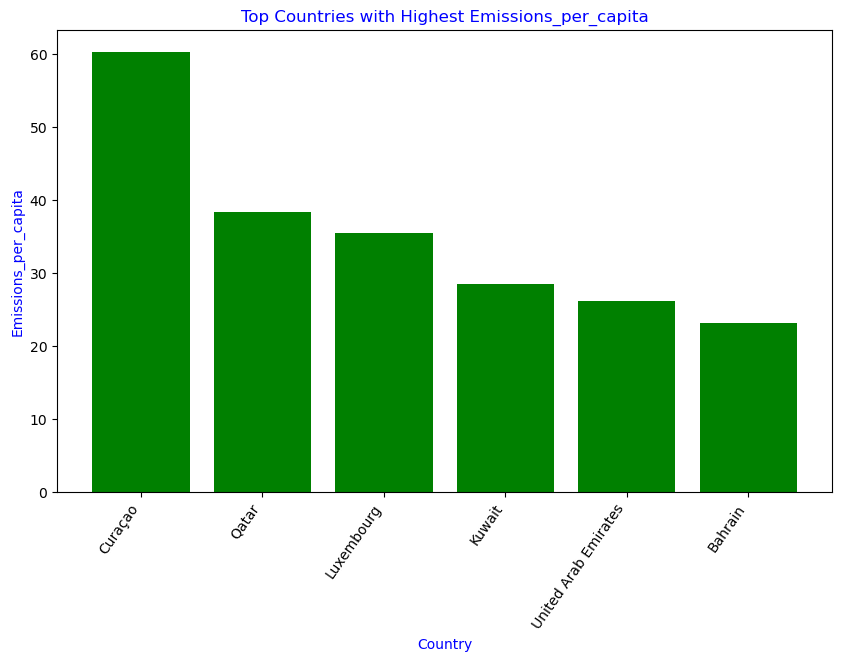

In [19]:
column_to_plot = 'Emissions_per_capita'
# Find the top 10 countries with the highest values
top_countries = new_df.nlargest(20, column_to_plot)

# Create a bar plot for the top 10 countries
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries[column_to_plot], color='green')
plt.xlabel('Country',color="blue")
plt.ylabel(column_to_plot, color="blue")
plt.title(f'Top Countries with Highest {column_to_plot}',color="blue")
plt.xticks(rotation=55, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### Top Countries with Highest Emissions per Thousand

This code is dedicated to visualizing the countries with the highest values in the 'Emissions_per_thousand' column. Here's an explanation of each part of the code:

1. **Selection of Column:** The variable `column_to_plot` is set to 'Emissions_per_thousand', indicating the specific column to visualize.
2. **Top Countries Selection:** The DataFrame is filtered to include the top 25 countries with the highest values in the selected column using `nlargest(25, column_to_plot)`.
3. **Bar Plot Creation:** A bar plot is generated using `plt.bar()` to represent the 'Emissions_per_thousand' values for each of the top 25 countries.
4. **Styling:** Labels, title, and rotation of x-axis labels are customized for clarity and aesthetics.
5. **Display:** The final bar plot is shown using `plt.show()`.

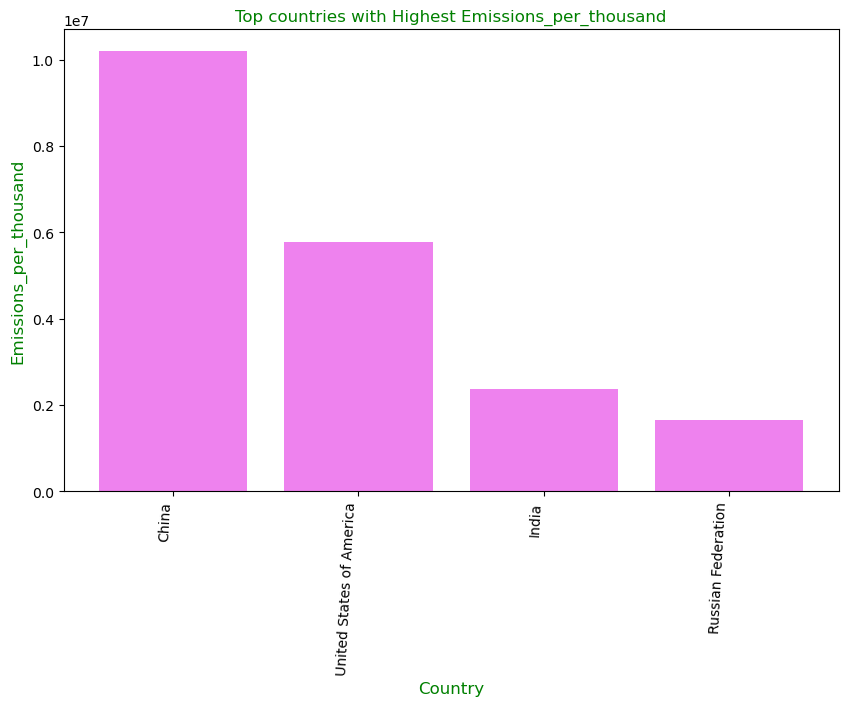

In [20]:
column_to_plot = 'Emissions_per_thousand'
# Find the top countries with the highest Emissions_per_thousand values
top_countries = new_df.nlargest(25, column_to_plot)
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries[column_to_plot], color= "violet")
plt.xlabel('Country',fontsize=12,color="green")
plt.ylabel(column_to_plot,fontsize=12,color="green")
plt.title(f'Top countries with Highest {column_to_plot}',fontsize=12,color="green")
plt.xticks(rotation=87, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Countries with Lowest Emissions per Thousand

This code is designed to visualize the countries with the lowest values in the 'Emissions_per_thousand' column. Here's a breakdown of the code:

1. **Column Selection:** The variable `column_to_plot` is set to 'Emissions_per_thousand', specifying the column to be visualized.
2. **Bottom Countries Selection:** Using `nsmallest(10, column_to_plot)`, the DataFrame is filtered to include the 10 countries with the lowest values in the selected column.
3. **Bar Plot Creation:** A bar plot is generated using Seaborn's `barplot()` function, representing the 'Emissions_per_thousand' values for each of the bottom 10 countries. The 'viridis' color palette is applied for a visually appealing representation.
4. **Styling:** Labels, title, and rotation of x-axis labels are customized for clarity and aesthetics.
5. **Display:** The final bar plot is shown using `plt.show()`.

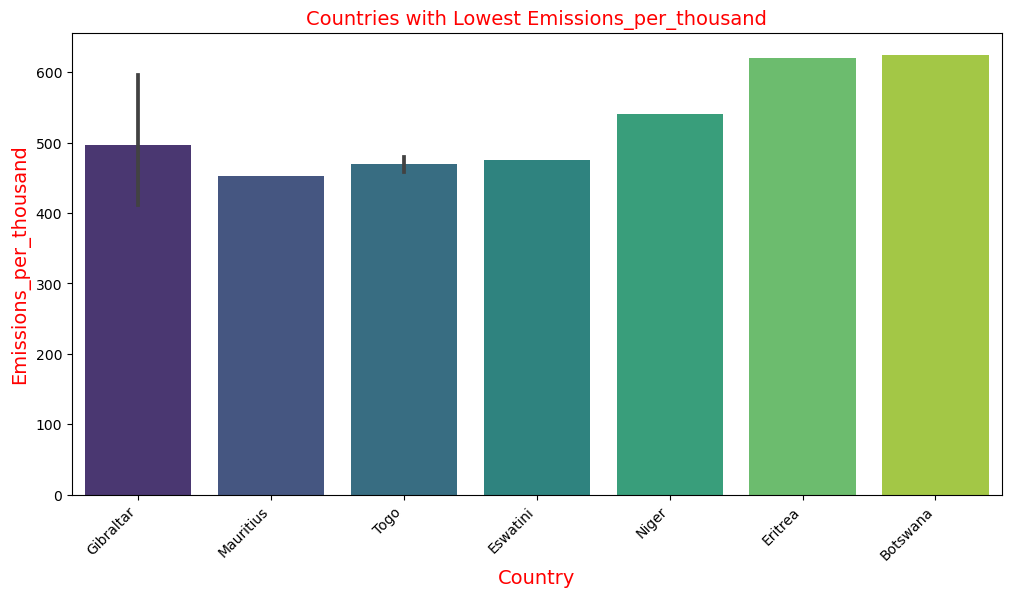

In [21]:
column_to_plot = 'Emissions_per_thousand'

# Find the 10 countries with the lowest values
bottom_countries = new_df.nsmallest(10, column_to_plot)

# Create a bar plot for the bottom 10 countries with different colors
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y=column_to_plot, data=bottom_countries, palette='viridis')
plt.xlabel('Country',fontsize=14,color="red")
plt.ylabel(column_to_plot,fontsize=14,color="red")
plt.title(f'Countries with Lowest {column_to_plot}',fontsize=14,color="red")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()